# Content

1. [Feature Selection on Diabetes Dataset](#1)
2. [Load Data](#2)
3. [Data Preparation](#3)
4. [Tree-based Model Feature Importance (Random Forest Classifier)](#4)
5. [Recursive Feature Elimination (RFE)](#5)

## 1. Feature Selection on Diabetes Dataset<a name = 1></a>

- In this notebook, we'll explore several feature selection methods and apply them to the diabetes dataset.
- The goal is to determine which features are most crucial and if there is an optimal number of features to train the model.

## 2. Load Data<a name = 2></a>

In [1]:
import pandas as pd

In [2]:
diabetes_df = pd.read_csv('diabetes_clean_scaled.csv')

## 3. Data Preparation<a name = 3></a>

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = diabetes_df.drop(columns='Outcome')
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,-0.849975,-0.948097,-1.164009,-1.311692,-1.496010,-1.435698,-0.690659,-1.250284
139,0.606143,-0.490556,-0.019559,0.045089,1.772127,0.768552,-1.407882,-0.238448
485,-1.592118,0.593970,-0.402399,1.521766,1.260406,1.518592,-0.114043,-0.857460
547,0.337590,0.468873,-0.402399,-0.928636,0.447848,0.191600,-1.399804,-0.238448
18,-0.849975,-0.577310,-1.919628,1.078628,-0.856412,1.649751,-1.219892,0.325504
...,...,...,...,...,...,...,...,...
71,0.606143,0.714225,-0.783908,0.740160,0.119073,-0.557111,0.097256,-0.524371
106,-0.849975,-0.899519,1.718006,-1.208405,-0.753929,-1.742004,-1.043512,-0.376157
270,1.586906,-0.666332,1.329934,0.966418,0.454870,1.804268,1.787773,0.741286
435,-1.592118,0.772637,-0.019559,0.785613,1.317925,1.531809,-1.057790,-0.110174


## 4. Tree-based Model Feature Importance (Random Forest Classifier)<a name = 4></a>

In [5]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest classifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X_train, y_train)

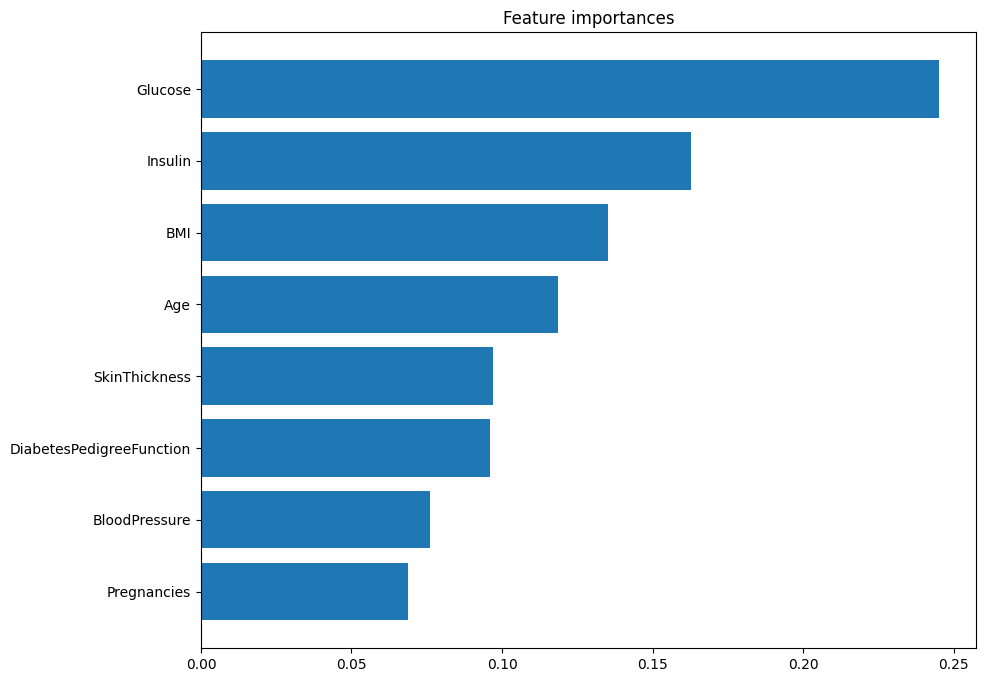

In [6]:
# Plot feature importances
importances = clf.feature_importances_
indices = sorted(range(len(importances)), key=lambda k: importances[k])
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.show()

In [39]:
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
1,Glucose,0.245188
4,Insulin,0.162729
5,BMI,0.135227
7,Age,0.118743
3,SkinThickness,0.097082
6,DiabetesPedigreeFunction,0.095955
2,BloodPressure,0.076165
0,Pregnancies,0.068911


- **Glucose** is the most important feature, as expected, followed by Insulin, BMI, and Age.
- **DiabetesPedigreeFunction, SkinThickness, BloodPressure**, and **Pregnancies** have relatively lower importance scores.

## 5. Recursive Feature Elimination (RFE)<a name = 5></a>

In [36]:
from sklearn.feature_selection import RFE

# Initialize RFE with the Random Forest classifier and fit to the data
selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), step=1)
selector = selector.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = selector.ranking_

# Create a dataframe to display feature rankings
rfe_results = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking
}).sort_values(by='Ranking')

rfe_results

,Feature,Ranking
1,Glucose,1
4,Insulin,1
5,BMI,1
7,Age,1
3,SkinThickness,2
6,DiabetesPedigreeFunction,3
2,BloodPressure,4
0,Pregnancies,5


Glucose, Insulin, BMI and Age have a ranking 1, highlithing its importance.
SkinThickness follows with a ranking 2. Then, DiabetesPedigreeFunction, BloodPressure and Pregnancies have relatively lower importance scores.
